In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IsingSolutions import ising2d_exact, ising3d_monte_carlo as ising3d_mc
from TNModels import AKLT3D
from scipy.interpolate import interp1d,PchipInterpolator
from glob import glob
import numpy as np
import os


In [2]:
def plot_obs_by_layer(df,param_name,obs_name,exact_critical_param=None,exact_obs_func=None,ylim=None,xlim=None,max_layer=None):
    beta_min,beta_max=df[param_name].min(),df[param_name].max()
    nLayers=df['iLayer'].max()+1
    if max_layer is not None: nLayers=min(nLayers,max_layer)
    iLayers=np.arange(2,nLayers,2)
    betas=np.linspace(beta_min,beta_max,100)
    if xlim: betas=np.linspace(max(xlim[0],beta_min),min(xlim[1],beta_max),100)
    cm=plt.get_cmap('jet')
    plt.rcParams.update({'font.size': 14,'legend.fontsize':10})
    plt.figure(figsize=(6,4))
    plt.ylabel(obs_name)
    plt.xlabel(param_name)
    if exact_critical_param:
        plt.axvline(exact_critical_param,color='k',linestyle=':',label='Exact critical point')
    for iLayer in iLayers:
        df1=df[df['iLayer']==iLayer].sort_values(param_name)
        df1=df1[np.isfinite(df1[obs_name])]
        plt.plot(df1[param_name],df1[obs_name],'+',label='Layer %d'%iLayer,color=cm(iLayer/nLayers))
        # f1=PchipInterpolator(df1[param_name],df1[obs_name])
        f1=interp1d(df1[param_name],df1[obs_name],kind='linear',fill_value='extrapolate')
        plt.plot(betas,f1(betas),color=cm(iLayer/nLayers,alpha=.3))
    if callable(exact_obs_func):
        plt.plot(betas,exact_obs_func(betas),color='k',linestyle='--',label='Exact')
    elif isinstance(exact_obs_func,(float,int)):
        plt.axhline(exact_obs_func,color='k',linestyle='--',label='Exact')
    if ylim:plt.ylim(ylim)
    if xlim:plt.xlim(xlim)
    plt.legend(ncol=2, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

def load_df(filenames):
    filenames=sorted(filenames,key=lambda x:os.path.getmtime(x))
    dfs=[]
    for filename in filenames:
        df=pd.read_csv(filename)
        dfs.append(df)
        print(filename)
    df=pd.concat(dfs)
    df['magnetizationXY']=(df['magnetizationX']**2+df['magnetizationY']**2)**.5
    df['magnetizationXYZ']=(df['magnetizationX']**2+df['magnetizationY']**2+df['magnetizationZ']**2)**.5
    return df

./data/aklt3d_X10_scan_a1/a1_0.0000000_a2_1.8257419_a3_4.4721360.pt/observables.csv
./data/aklt3d_X10_scan_a1/a1_0.1154701_a2_1.8257419_a3_4.4721360.pt/observables.csv
./data/aklt3d_X10_scan_a1/a1_0.2309401_a2_1.8257419_a3_4.4721360.pt/observables.csv
./data/aklt3d_X10_scan_a1/a1_0.3464102_a2_1.8257419_a3_4.4721360.pt/observables.csv
./data/aklt3d_X10_scan_a1/a1_0.4618802_a2_1.8257419_a3_4.4721360.pt/observables.csv
./data/aklt3d_X10_scan_a1/a1_0.5773503_a2_1.8257419_a3_4.4721360.pt/observables.csv
./data/aklt3d_X10_scan_a1/a1_0.6928203_a2_1.8257419_a3_4.4721360.pt/observables.csv
./data/aklt3d_X10_scan_a1/a1_0.8082904_a2_1.8257419_a3_4.4721360.pt/observables.csv
./data/aklt3d_X10_scan_a1/a1_0.9237604_a2_1.8257419_a3_4.4721360.pt/observables.csv
./data/aklt3d_X10_scan_a1/a1_1.0392305_a2_1.8257419_a3_4.4721360.pt/observables.csv
./data/aklt3d_X10_scan_a1/a1_1.1547005_a2_1.8257419_a3_4.4721360.pt/observables.csv
./data/aklt3d_X10_scan_a1/a1_1.2701706_a2_1.8257419_a3_4.4721360.pt/observab

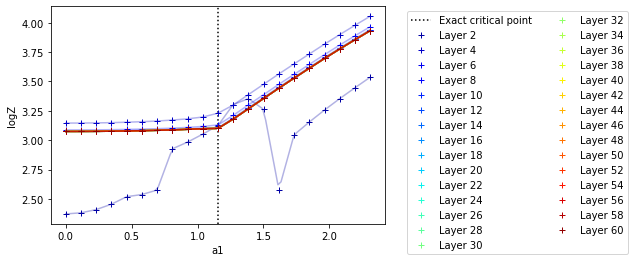

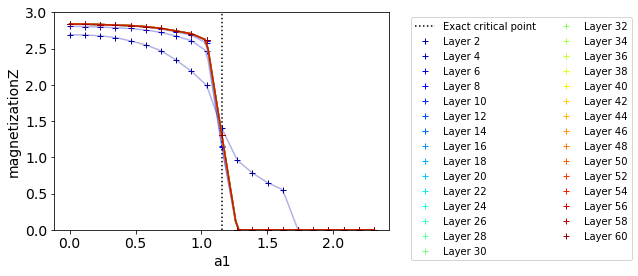

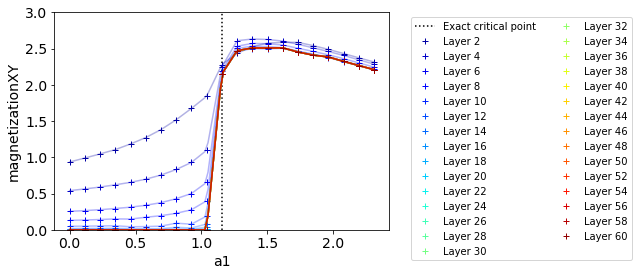

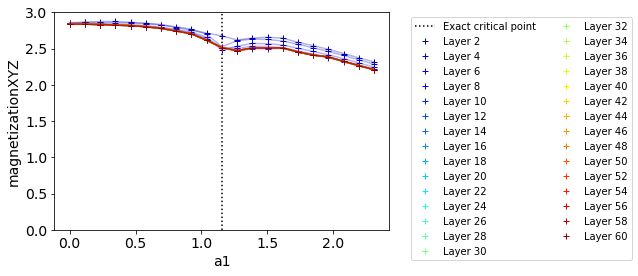

./data/aklt3d_X10_scan_a2/a1_1.1547005_a2_0.0000000_a3_4.4721360.pt/observables.csv
./data/aklt3d_X10_scan_a2/a1_1.1547005_a2_0.1825742_a3_4.4721360.pt/observables.csv
./data/aklt3d_X10_scan_a2/a1_1.1547005_a2_0.3651484_a3_4.4721360.pt/observables.csv
./data/aklt3d_X10_scan_a2/a1_1.1547005_a2_0.5477226_a3_4.4721360.pt/observables.csv
./data/aklt3d_X10_scan_a2/a1_1.1547005_a2_0.7302967_a3_4.4721360.pt/observables.csv
./data/aklt3d_X10_scan_a2/a1_1.1547005_a2_0.9128709_a3_4.4721360.pt/observables.csv
./data/aklt3d_X10_scan_a2/a1_1.1547005_a2_1.0954451_a3_4.4721360.pt/observables.csv
./data/aklt3d_X10_scan_a2/a1_1.1547005_a2_1.2780193_a3_4.4721360.pt/observables.csv
./data/aklt3d_X10_scan_a2/a1_1.1547005_a2_1.4605935_a3_4.4721360.pt/observables.csv
./data/aklt3d_X10_scan_a2/a1_1.1547005_a2_1.6431677_a3_4.4721360.pt/observables.csv
./data/aklt3d_X10_scan_a2/a1_1.1547005_a2_1.8257419_a3_4.4721360.pt/observables.csv
./data/aklt3d_X10_scan_a2/a1_1.1547005_a2_2.0083160_a3_4.4721360.pt/observab

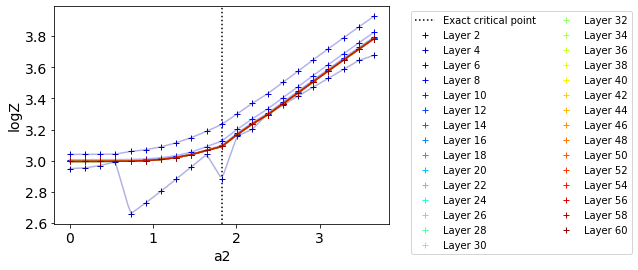

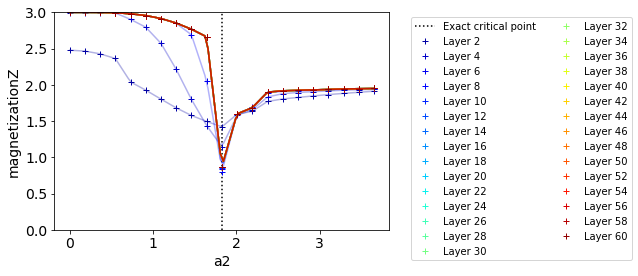

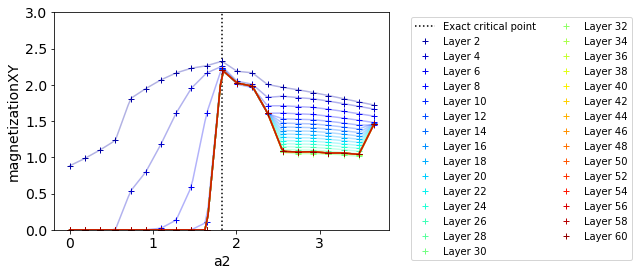

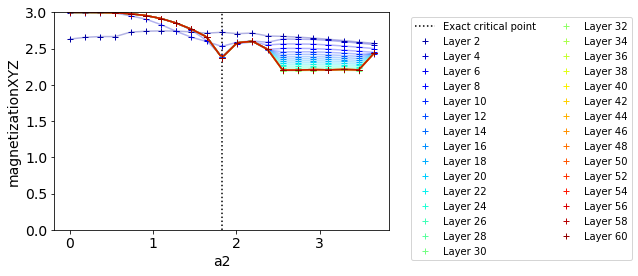

./data/aklt3d_X10_scan_a3/a1_1.1547005_a2_1.8257419_a3_0.0000000.pt/observables.csv
./data/aklt3d_X10_scan_a3/a1_1.1547005_a2_1.8257419_a3_0.4472136.pt/observables.csv
./data/aklt3d_X10_scan_a3/a1_1.1547005_a2_1.8257419_a3_0.8944272.pt/observables.csv
./data/aklt3d_X10_scan_a3/a1_1.1547005_a2_1.8257419_a3_1.3416408.pt/observables.csv
./data/aklt3d_X10_scan_a3/a1_1.1547005_a2_1.8257419_a3_1.7888544.pt/observables.csv
./data/aklt3d_X10_scan_a3/a1_1.1547005_a2_1.8257419_a3_2.2360680.pt/observables.csv
./data/aklt3d_X10_scan_a3/a1_1.1547005_a2_1.8257419_a3_2.6832816.pt/observables.csv
./data/aklt3d_X10_scan_a3/a1_1.1547005_a2_1.8257419_a3_3.1304952.pt/observables.csv
./data/aklt3d_X10_scan_a3/a1_1.1547005_a2_1.8257419_a3_3.5777088.pt/observables.csv
./data/aklt3d_X10_scan_a3/a1_1.1547005_a2_1.8257419_a3_4.0249224.pt/observables.csv
./data/aklt3d_X10_scan_a3/a1_1.1547005_a2_1.8257419_a3_4.4721360.pt/observables.csv
./data/aklt3d_X10_scan_a3/a1_1.1547005_a2_1.8257419_a3_4.9193496.pt/observab

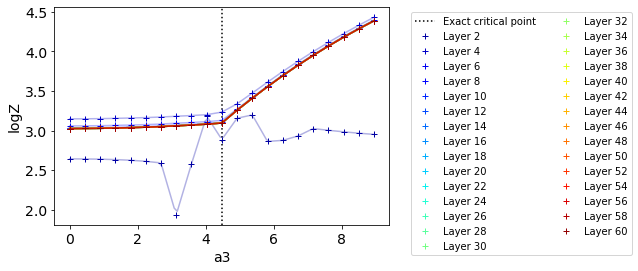

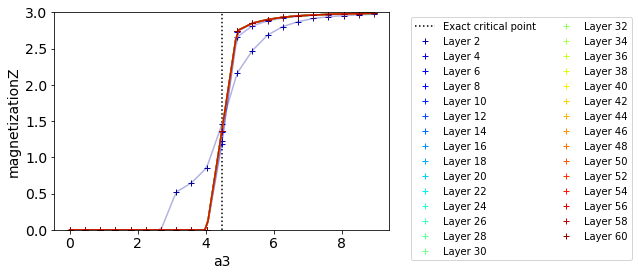

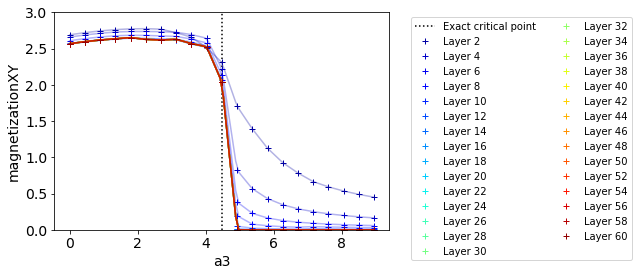

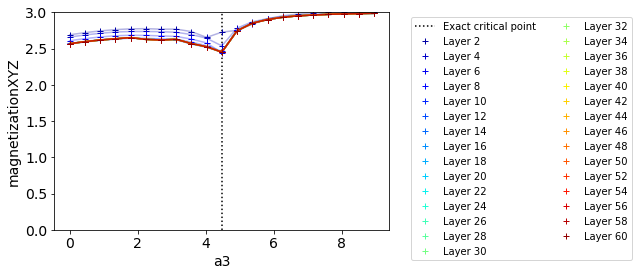

In [3]:
critical_params={'a1':np.sqrt(20/15),'a2':np.sqrt(20/6),'a3':np.sqrt(20/1)}

df=load_df(glob('./data/aklt3d_X10_scan_a1/*/observables.csv'))
exact_critical_param=critical_params['a1']
plot_obs_by_layer(df,'a1','logZ',exact_critical_param)
plot_obs_by_layer(df,'a1','magnetizationZ',exact_critical_param,ylim=[0,3])
plot_obs_by_layer(df,'a1','magnetizationXY',exact_critical_param,ylim=[0,3])
plot_obs_by_layer(df,'a1','magnetizationXYZ',exact_critical_param,ylim=[0,3])

df=load_df(glob('./data/aklt3d_X10_scan_a2/*/observables.csv'))
exact_critical_param=critical_params['a2']
plot_obs_by_layer(df,'a2','logZ',exact_critical_param)
plot_obs_by_layer(df,'a2','magnetizationZ',exact_critical_param,ylim=[0,3])
plot_obs_by_layer(df,'a2','magnetizationXY',exact_critical_param,ylim=[0,3])
plot_obs_by_layer(df,'a2','magnetizationXYZ',exact_critical_param,ylim=[0,3])

df=load_df(glob('./data/aklt3d_X10_scan_a3/*/observables.csv'))
exact_critical_param=critical_params['a3']
plot_obs_by_layer(df,'a3','logZ',exact_critical_param)
plot_obs_by_layer(df,'a3','magnetizationZ',exact_critical_param,ylim=[0,3])
plot_obs_by_layer(df,'a3','magnetizationXY',exact_critical_param,ylim=[0,3])
plot_obs_by_layer(df,'a3','magnetizationXYZ',exact_critical_param,ylim=[0,3])